* import and load the data

In [9]:
# this is used to load the package, and name it as "pd" for short.
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# not going to explain this 
# selection Titanic train dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (1).csv


In [ ]:
# if you were running python on your pc instead of google collab
# you would do -> df = pd.read_csv(PATH) where PATH is the location of the file -> 'C://User/Downloads/train.csv'

In [17]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* overview

In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* numerical features

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

* categorical variables

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
df.groupby('Survived').std()

AttributeError: ignored

* Creating a new variable from the others

In [ ]:
df['Gender'] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.loc[df['Sex'] == 'male', 'Gender'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.852459
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.318713


* plots

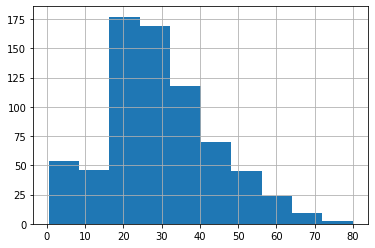

In [26]:
df.Age.hist(bins = 10)

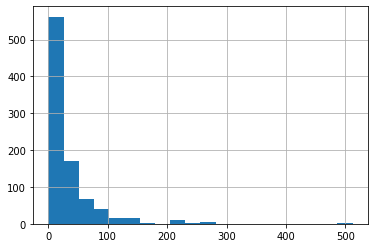

In [ ]:
df.Fare.hist(bins = 20)

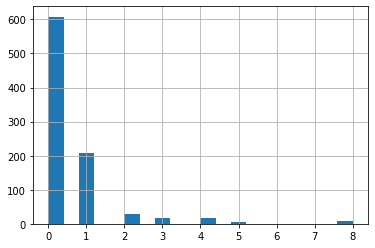

In [ ]:
df.SibSp.hist(bins = 20)

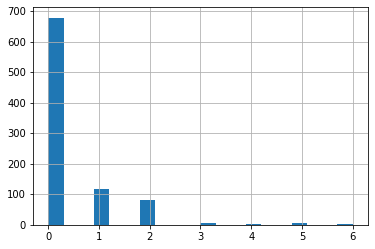

In [ ]:
df.Parch.hist(bins = 20)

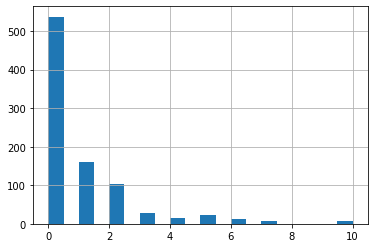

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']
df.family_size.hist(bins = 20)


* subsetting

In [28]:
# column based
df_male = df[df['Sex'] == 'male']
df_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# row based
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1


In [ ]:
# exact row col index
df.iloc[0:10, 0:2]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


In [ ]:
# specific cols and rows
df.iloc[[1, 10, 4], [4, 5]]

,Sex,Age
1,female,38.0
10,female,4.0
4,male,35.0


In [ ]:
# subset of columns
df2 = df[['Age', 'Gender']]

* sorting

In [ ]:
df.sort_values(by = 'Age', ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,0
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1,0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,10
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,0


* null handling

In [ ]:
df_without_nulls = df.dropna()
df_without_nulls.shape

(183, 14)

In [ ]:
df_with_filled_nulls = df.fillna(0)
df_with_filled_nulls.shape

(891, 14)

* column name change

In [ ]:
df_subset = df[['Age', 'Gender']]
df_subset.columns = ['A', 'B']
df_subset

,A,B
0,22.0,1
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,1
...,...,...
886,27.0,1
887,19.0,0
888,NaN,0
889,26.0,1


* grouping

In [ ]:
df_age_gender = df[['Age', 'Gender']]
df_age_gender.groupby('Gender').max().sort_values(by ='Age')

,Age
Gender,
0,63.0
1,80.0


* concat

In [ ]:
df_age_gender = df[['Age', 'Gender']]
df_age_gender.groupby('Gender').max().sort_values(by ='Gender')

df_age_Fare = df[['Fare', 'Gender']]
df_age_Fare.groupby('Gender').max().sort_values(by ='Gender')

pd.concat([df_age_gender, df_age_Fare], axis = 1)

,Age,Gender,Fare,Gender
0,22.0,1,7.2500,1
1,38.0,0,71.2833,0
2,26.0,0,7.9250,0
3,35.0,0,53.1000,0
4,35.0,1,8.0500,1
...,...,...,...,...
886,27.0,1,13.0000,1
887,19.0,0,30.0000,0
888,NaN,0,23.4500,0
889,26.0,1,30.0000,1


* apply any function

In [ ]:
def square_plus_1(x):
  return x ** 2 + 1

square_plus_1(3)


10

In [ ]:
df['Function_on_Age'] = df['Age'].apply(square_plus_1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size,Function_on_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,485.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1445.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,677.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1226.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,730.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,362.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,3,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,677.0


In [ ]:
def woman_or_child(gender, age):
  if ((age<12) or (gender==0)):
    return 1
  else:
    return 0
  
df['woman_or_child'] = df.apply(lambda x: woman_or_child(x['Gender'], x['Age']), axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size,Function_on_Age,woman_or_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,485.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1445.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,677.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1226.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1226.0,0


In [ ]:
def unmarried_woman(name):
  if ('Miss' in name):
    return 1
  else:
    return 0
  
df['unmarried_woman'] = df.apply(lambda x: unmarried_woman(x['Name']), axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size,Function_on_Age,woman_or_child,unmarried_woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,485.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1445.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,677.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1226.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1226.0,0,0


* simple prediction rules

In [ ]:
# baseline -> all survive
df['prediction_all_survive'] = 1

# check accuracy 
df[df.prediction_all_survive == df.Survived].shape[0]/df.shape[0]

0.3838383838383838

In [ ]:
# baseline -> all die
df['prediction_all_die'] = 0

# check accuracy 
df[df.prediction_all_die == df.Survived].shape[0]/df.shape[0]

0.6161616161616161

In [ ]:
# Rich survive
df['prediction_rich_survive'] = 0
df.loc[(df.Pclass == 1), 'prediction_rich_survive'] = 1

# check accuracy 
df[df.prediction_rich_survive == df.Survived].shape[0]/df.shape[0]

0.6790123456790124

In [ ]:
# People who were alone died 
df['prediction_alone_died'] = 0
df.loc[(df.family_size == 1), 'prediction_alone_died'] = 1

# check accuracy 
df[df.prediction_alone_died == df.Survived].shape[0]/df.shape[0]

0.6352413019079686

In [ ]:
# Women survive
df['prediction_women_survive'] = 0
df.loc[(df.Gender == 0), 'prediction_women_survive'] = 1

# check accuracy 
df[df.prediction_women_survive == df.Survived].shape[0]/df.shape[0]

0.7867564534231201

In [ ]:
# Women or Rich survive
df['prediction_women_or_rich_survive'] = 0
df.loc[(df.Gender == 0) | (df.Pclass == 1), 'prediction_women_or_rich_survive'] = 1

# check accuracy 
df[df.prediction_women_or_rich_survive == df.Survived].shape[0]/df.shape[0]

0.7508417508417509

In [ ]:
# Women or with Large Family survive
df['prediction_women_or_familied_survive'] = 0
df.loc[(df.Gender == 0) | (df.family_size > 1), 'prediction_women_or_familied_survive'] = 1

# check accuracy 
df[df.prediction_women_or_familied_survive == df.Survived].shape[0]/df.shape[0]

0.7441077441077442

In [ ]:
# Women or Child survive
df['prediction_women_or_child'] = 0
df.loc[(df.Gender == 0) | (df.Age < 10), 'prediction_women_or_child'] = 1

# check accuracy 
df[df.prediction_women_or_child == df.Survived].shape[0]/df.shape[0]

0.7934904601571269

In [ ]:
# Women or Child survive
def child_from_name(x):
  if 'master' in x.lower():
    return 1
  else:
    return 0

# check accuracy 
df['child_from_name'] = df['Name'].apply(child_from_name)

# Women or Child survive
df['prediction_women_or_child'] = 0
df.loc[(df.Gender == 0) | (df.Age < 10) | (df.child_from_name == 1), 'prediction_women_or_child'] = 1

# check accuracy 
df[df.prediction_women_or_child == df.Survived].shape[0]/df.shape[0]

0.7934904601571269

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,family_size,Function_on_Age,woman_or_child,unmarried_woman,prediction_all_survive,prediction_all_die,prediction_rich_survive,prediction_alone_died,prediction_women_survive,prediction_women_or_rich_survive,prediction_women_or_familied_survive,prediction_women_or_child,child_from_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,485.0,0,0,1,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1445.0,1,0,1,0,1,1,1,1,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,677.0,1,1,1,0,0,0,1,1,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1226.0,1,0,1,0,1,1,1,1,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1226.0,0,0,1,0,0,0,0,0,0,0,0


* basically women and children survive. 

In [ ]:
df['surname'] = df.Name.str.split().str[-1]
df['surname'] = df['surname'].str.replace(')', '')
df['surname'] = df['surname'].str.replace('(', '')
df['surname'] = df['surname'].str.replace('"', '')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2117353b38>]],
      dtype=object)

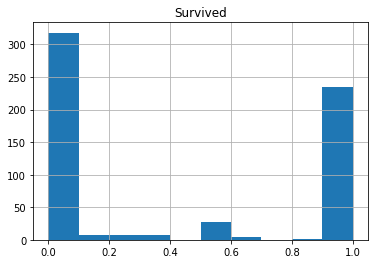

In [ ]:
# Either all families survive, or they all die.
df[['Survived', 'surname']].groupby('surname').mean().hist()

In [ ]:
df_temp = df[['Survived', 'surname']].groupby('surname').mean().sort_values(by = 'Survived')
df_temp.reset_index(inplace = True)
print(df_temp.head(20))
families_who_survive = list(df_temp['surname'][df_temp.Survived == 1])

      surname  Survived
0        Erik       0.0
1       Olsen       0.0
2       Orsen       0.0
3     Govaert       0.0
4    Gottfrid       0.0
5   Goransson       0.0
6       Oskar       0.0
7      Ossian       0.0
8       Ojala       0.0
9     Gilbert       0.0
10     Gideon       0.0
11      Paust       0.0
12      Peder       0.0
13    Gerious       0.0
14       Peju       0.0
15      Penko       0.0
16          G       0.0
17    Gifford       0.0
18     Fuller       0.0
19      Ogden       0.0


In [ ]:
families_who_survive[0:10]

['Brown',
 'Bertha',
 'Bernt',
 'Sternin',
 'Campbell',
 'Bridget',
 'Bone',
 'Thayer',
 'Bloomfield',
 'Brayton']

In [ ]:
# families with women and children would then be more likely to survive
# can we use this family based information?

In [ ]:
df['surname']

0       Harris
1       Thayer
2        Laina
3         Peel
4        Henry
        ...   
886     Juozas
887      Edith
888     Carrie
889     Howell
890    Patrick
Name: surname, Length: 891, dtype: object

In [ ]:
# Women or Child survive, or men from families with higher proportion of women
def child_from_name(x):
  if 'master' in x.lower():
    return 1
  else:
    return 0

# check accuracy 
df['child_from_name'] = df['Name'].apply(child_from_name)

# Women or Child survive
df['prediction_women_or_child'] = 0
df.loc[((df.Gender == 0) | (df.Age < 10) | (df.child_from_name == 1)) | (df['surname'].isin(families_who_survive)), 'prediction_women_or_child'] = 1

# check accuracy 
df[df.prediction_women_or_child == df.Survived].shape[0]/df.shape[0]

0.8507295173961841